In [15]:
import tensorflow as tf
import tensorflow.contrib.layers as layers
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
tf.reset_default_graph()

In [2]:
# data
boston=datasets.load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['target']=boston.target

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


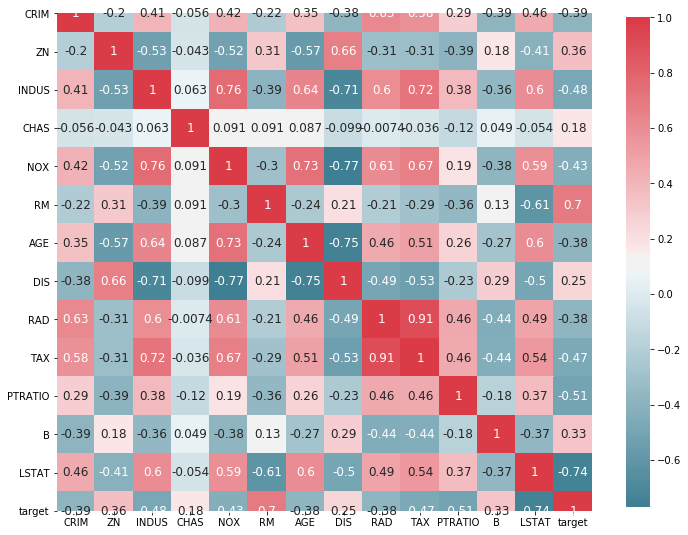

In [5]:
# plotting correlation color map
_,ax=plt.subplots(figsize=(12,10))
corr=df.corr(method='pearson')
cmap=sns.diverging_palette(220,10,as_cmap=True)
_=sns.heatmap(corr,cmap=cmap,square=True,cbar_kws={'shrink':.9},ax=ax,
             annot=True,annot_kws={'fontsize':12})

In [8]:
# create Train&Test split, select features: RM\PTRATIO\LSTAT
X_train, X_test, y_train, y_test=train_test_split(df[['RM','LSTAT','PTRATIO']],
                                                 df[['target']], test_size=0.3,
                                                 random_state=0)
# normalize data
X_train=MinMaxScaler().fit_transform(X_train)
y_train=MinMaxScaler().fit_transform(y_train)
X_test=MinMaxScaler().fit_transform(X_test)
y_test=MinMaxScaler().fit_transform(y_test)

In [9]:
# nerwork parameters and hyperparameters
m=len(X_train)
n=3 # Number of features
n_hidden=20

batch_size=200
eta=0.01
max_epoch=1000


In [10]:
def multilayer_perceptron(x):
    fc1=layers.fully_connected(x,n_hidden,activation_fn=tf.nn.relu,scope='fc1')
    out=layers.fully_connected(fc1,1,activation_fn=tf.sigmoid,scope='out')
    return out

In [16]:
# build model
x=tf.placeholder(tf.float32,shape=[m,n],name="X")
y=tf.placeholder(tf.float32,shape=[m,1],name='Y')
y_hat=multilayer_perceptron(x)
correct_pred=tf.square(y-y_hat)
mse=tf.reduce_mean(tf.cast(correct_pred,'float'))
train=tf.train.AdamOptimizer(learning_rate=eta).minimize(mse)
init=tf.global_variables_initializer()

Epoch 0: Loss 0.04685415327548981
Epoch 100: Loss 0.0101183345541358
Epoch 200: Loss 0.008740739896893501
Epoch 300: Loss 0.008043340407311916
Epoch 400: Loss 0.007549587171524763
Epoch 500: Loss 0.007132729049772024
Epoch 600: Loss 0.006906693335622549
Epoch 700: Loss 0.006774084642529488
Epoch 800: Loss 0.0066603682935237885
Epoch 900: Loss 0.006566224619746208
Training Done
Mean Error: 0.006476505


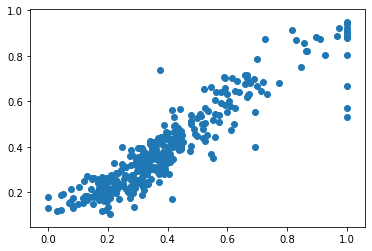

In [17]:
# Train
with tf.Session() as sess:
    sess.run(init)
    writer=tf.summary.FileWriter('../data/mlp-regression-for-boston-housing',sess.graph)
    for epoch in range(max_epoch):
        _,epoch_loss,pred=sess.run([train,mse,y_hat],feed_dict={x:X_train,y:y_train})
        if epoch%100==0:
            print('Epoch {0}: Loss {1}'.format(epoch,epoch_loss))
    print("Training Done")
    
    #Test model
    
    accuracy=tf.reduce_mean(tf.cast(correct_pred,'float'))
    print('Mean Error:',accuracy.eval({x:X_train,y:y_train}))
    plt.scatter(y_train,pred)
    writer.close()